In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [5]:
import os

In [18]:
#Custom Explore Function
def explore(dataframe):
    # Shape
    print("Total Records: ", dataframe.shape[0])
          
    #Check Missing/Null
    x = dataframe.columns[dataframe.isnull().any()].tolist()   
    if not x:
        print("No Missing/Null Records")
    else:        
        print("Found Missing Records")

In [8]:
os.listdir('/Users/я')

['.anaconda',
 '.android',
 '.cache',
 '.conda',
 '.condarc',
 '.config',
 '.continuum',
 '.eclipse',
 '.esd_auth',
 '.fontconfig',
 '.gimp-2.8',
 '.gitconfig',
 '.gitignore',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.Origin',
 '.packettracer',
 '.pluto.tv',
 '.pytest_cache',
 '.QtWebEngineProcess',
 '.swt',
 '.thumbnails',
 '.VirtualBox',
 '02_03. Datatypes and loops.ipynb',
 '04_Functions.ipynb',
 '10_testing.ipynb',
 '11_asyncio.ipynb',
 '11_asyncio_1.ipynb',
 '11_threads_processes.ipynb',
 '3D Objects',
 '7. Python class.ipynb',
 '8. netology_regex.ipynb',
 'all_28_10_2022.csv',
 'all_file_d.csv',
 'AppData',
 'Application Data',
 'archive_novouralsk.csv',
 'ChClFile_nsm.dat',
 'Cisco Packet Tracer 8.1.1',
 'Contacts',
 'Cookies',
 'designer.py',
 'Desktop',
 'Documents',
 'Downloads',
 'dublicate_file.csv',
 'edb_languagepack.exe',
 'edb_languagepack_3.exe',
 'edb_npgsql.exe',
 'edb_pgagent_pg15.exe',
 'edb_pgjdbc.exe',
 'edb_psqlodbc.exe',
 '

In [10]:
db=pd.read_csv('/Users/я/train_ch.csv')

In [11]:
db.head()

,Id,url,Predicted
0,0,http://banqsuepoy.temp.swtest.ru/pb/assistance...,1
1,1,https://my.mail.ru/community/mir24.tv/,0
2,2,https://rmailidtrack-b484fa.ingress-bonde.ewp....,1
3,3,http://tjvodxie.cn.b2b168.com/m296765p1/,0
4,4,https://articulate.com/360/review,0


In [12]:
len(db)

185910

In [15]:
db['Predicted'].value_counts()

1    93275
0    92635
Name: Predicted, dtype: int64

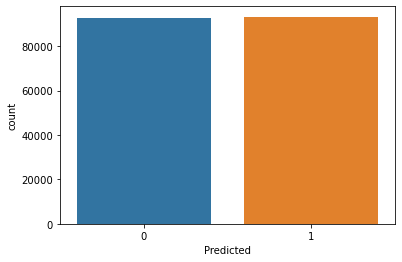

In [16]:
sns.countplot(data=db,x='Predicted')
plt.show()

In [17]:
db['url'].describe()

count                                                185910
unique                                               175579
top       https://ceska-posta-be61a7.ingress-erytho.ewp....
freq                                                     12
Name: url, dtype: object

In [19]:
explore(db)

Total Records:  185910
No Missing/Null Records


In [20]:
df=db.drop_duplicates(['url'])

In [21]:
df['url'].describe()

count                                                175579
unique                                               175579
top       http://banqsuepoy.temp.swtest.ru/pb/assistance...
freq                                                      1
Name: url, dtype: object

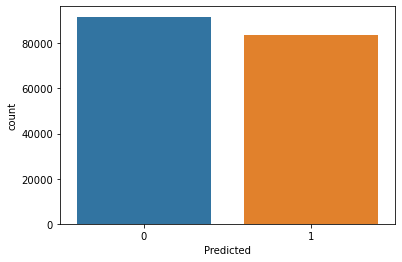

In [24]:
sns.countplot(data=df,x='Predicted')
plt.show()

In [25]:
df['Predicted'].value_counts()

0    91753
1    83826
Name: Predicted, dtype: int64

### Извлечение признаков на основе токенизации

In [22]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

### разделим данные на признаки и метки

In [26]:
X = df[['url']].copy()
y = df.Predicted.copy()

In [27]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")
cv = CountVectorizer()

In [28]:
df_test = pd.read_csv("/Users/я/test_ch.csv", sep=",")
X_test = df_test[['url']].copy()

In [30]:
X_test

,url
0,http://fb-ads-manager.multimo.co.id/immobilien...
1,https://www.hamdogs.net/login/wellsfargo/login...
2,https://help.ubuntu.com/community/UpgradeNotes
3,https://silverberrygroup.com/wp-admin/network/...
4,https://af.mil
...,...
46473,https://opensoul.me
46474,https://compag.cz/wp-content/upgrade/redirect/...
46475,https://66law.cn/www.66law.cn/ganxian/
46476,https://forum.guns.ru/forumtopics/155.html


In [31]:
def prepare_data(X) :
    X['text_tokenized'] = X.url.map(lambda t: tokenizer.tokenize(t))
    X['text_stemmed'] = X.text_tokenized.map(lambda t: [stemmer.stem(word) for word in t])
    X['text_sent'] = X.text_stemmed.map(lambda t: ' '.join(t))
    features = cv.fit_transform(X.text_sent)
    return X, features

In [32]:
def prepare_data_transform(X) :
    X['text_tokenized'] = X.url.map(lambda t: tokenizer.tokenize(t))
    X['text_stemmed'] = X.text_tokenized.map(lambda t: [stemmer.stem(word) for word in t])
    X['text_sent'] = X.text_stemmed.map(lambda t: ' '.join(t))
    features = cv.transform(X.text_sent)
    return X, features

In [33]:
_, _ = prepare_data(X_test)

In [34]:
X, features = prepare_data_transform(X)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators = 50, verbose=2)

In [40]:
trainX, testX, trainY, testY = train_test_split(features, y, test_size=1-0.8, stratify=y, random_state=42)
rfc.fit(trainX, trainY)
predY = rfc.predict(testX)
accuracy = accuracy_score(testY, predY)
precision = precision_score(testY, predY, pos_label=1)
recall = recall_score(testY, predY, pos_label=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 25.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.6s finished


In [42]:
print(f"accuracy = {accuracy} precision={precision} recall= {recall}")

accuracy = 0.9291206287732088 precision=0.90718767826583 recall= 0.9485833581866985


In [43]:
testY

100788    1
59675     0
131399    1
52777     0
55990     1
         ..
51619     1
157565    1
13311     0
95683     1
10900     1
Name: Predicted, Length: 35116, dtype: int64

In [44]:
X_test, features_test = prepare_data_transform(X_test)

In [45]:
pred_test = rfc.predict(features_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.6s finished


In [46]:
len(pred_test)

46478

In [53]:
submit = pd.DataFrame(pred_test, columns=["label"])

In [54]:
submit.to_csv(f"/Users/я/sample_submit_rfc_26.csv")